# Machine Learning I Homework

### 1. (Fake) Titanic Data Classification.

The file 'titanicMachLearn.csv' contains (fake) data showing an SES (socioeconomic status) measure, fare paid for the ticket, and whether the person survived or not. Our goal is to see if we can classify survival status based upon SES and fare.

**1a.** Do a k=3 nearest neighbor classification on the data using an 80/20 training/test split. Summarize the performance of the classifier.

**1b.** Make a scatter plot of the data with color showing the survival status. Does the plot intuitivly agree with the performance of your classifier?

In [18]:
import pandas as pd
import numpy as np

In [24]:
titanic = pd.read_csv('data/titanicMachLearn.csv')

In [25]:
print(titanic)

     SES  Fare  Survived
0     39    15         0
1     83    33         1
2     98    25         1
3     67    33         1
4     36    14         0
..   ...   ...       ...
886    4    11         0
887   54    33         1
888   25    11         0
889   52    32         1
890   37    21         0

[891 rows x 3 columns]


In [26]:
X = titanic[['SES', 'Fare']].to_numpy()

In [27]:
X.shape

(891, 2)

In [28]:
y = titanic[['Survived']].to_numpy()

In [29]:
y.shape

(891, 1)

In [30]:
y = np.squeeze(y)

In [31]:
y.shape

(891,)

In [32]:
import matplotlib.pyplot as plt

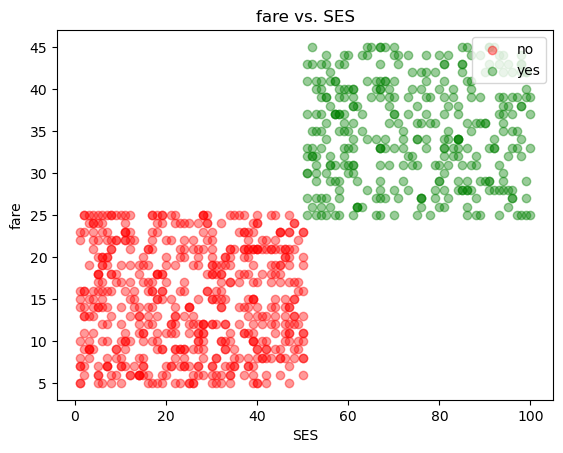

In [33]:
# Create a scatter plot of the first two features with color indicating category
colors = ['red', 'green']
surv = ['no', 'yes']


plt.scatter(X[y == 0, 0], X[y == 0, 1], 
            color='red', label='no', alpha = 0.4)
plt.scatter(X[y == 1, 0], X[y == 1, 1], 
            color='green', label='yes', alpha = 0.4)

plt.xlabel('SES')  # 
plt.ylabel('fare')  # Sepal width
plt.legend(loc="upper right")
plt.title("fare vs. SES")
plt.show()

### 2. Iris Data Classification.

Do a nearest neighbors classification on the iris data using the 2 variables you think would work best (i.e. *not* the exact same to variables we used in the in-class tutorial).

Compare the results with the results we got in class using the first two variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns
import pandas as pd

In [2]:
# Load the Iris dataset
iris = load_iris()

In [3]:
# Make variable from the iris dataset
X = iris.data
y = iris.target

In [4]:
# Create a pandas DataFrame from the dataset
df = pd.DataFrame(X, columns = iris.feature_names)

# Add the target column to the DataFrame as actual names
df['species'] = pd.Categorical.from_codes(y, iris.target_names)


In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

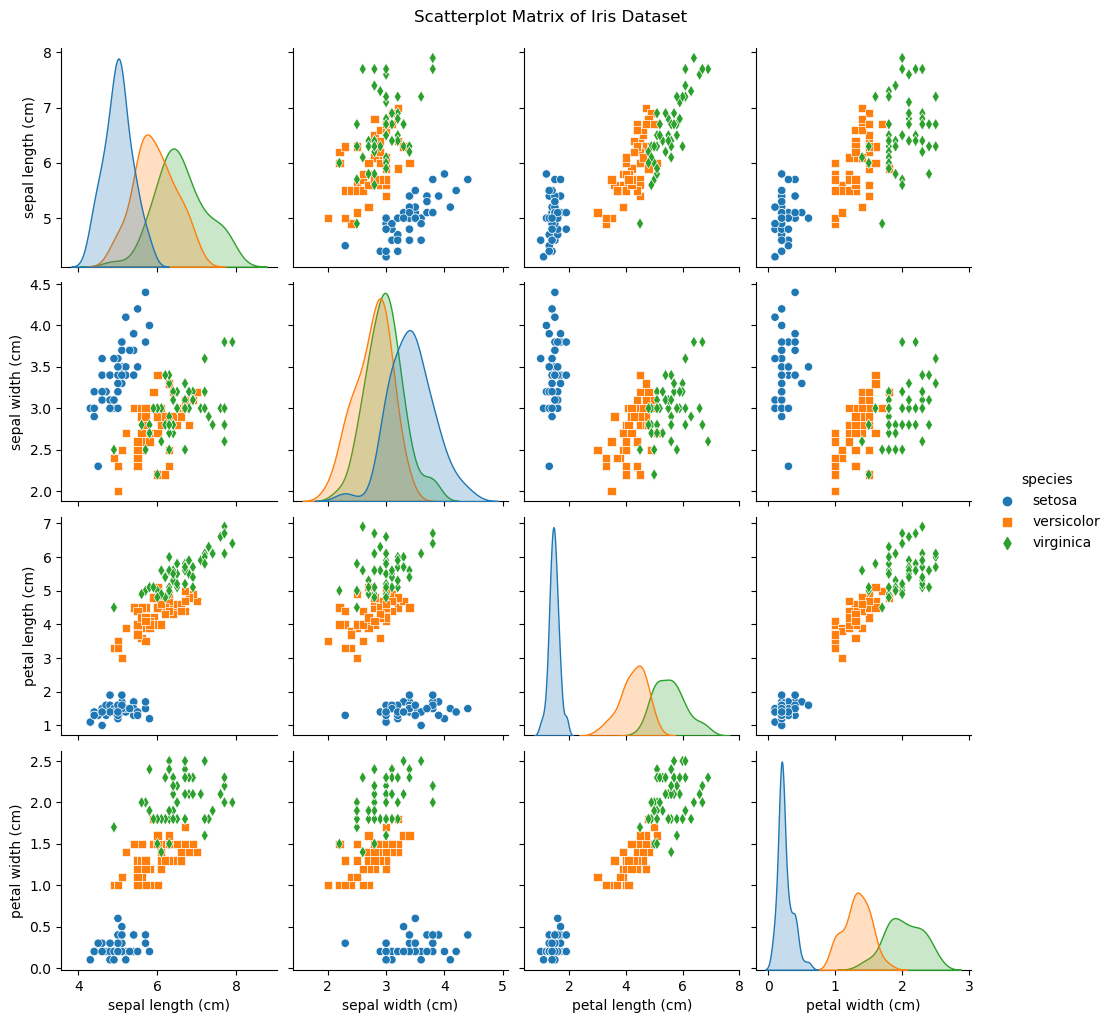

In [6]:
# Create a scatterplot matrix using seaborn's pairplot()
sns.pairplot(df, hue='species', markers=["o", "s", "d"]);
plt.suptitle("Scatterplot Matrix of Iris Dataset", y=1.02);
plt.show();


Pick more gooder features here!

In [12]:
X = iris.data[:, -2:]  # Use only the LAST two features (petal length and petal width)
y = iris.target

In [13]:
X.shape

(150, 2)

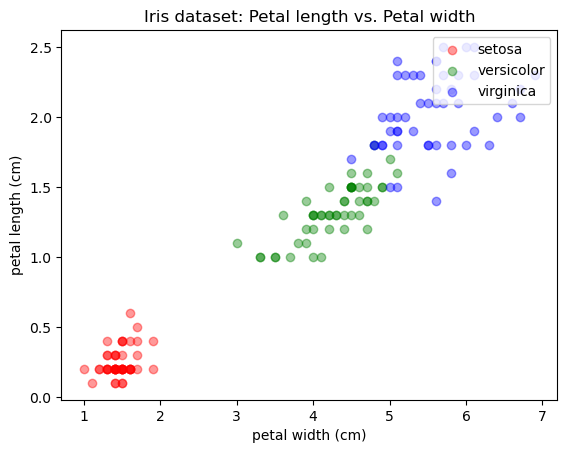

In [14]:
# Create a scatter plot of the LAST two features with color indicating category
colors = ['red', 'green', 'blue']
species = iris.target_names

for i, color, target_name in zip(range(3), colors, species):
    plt.scatter(X[y == i, 0], X[y == i, 1], 
                color=color, label=target_name, alpha = 0.4)

plt.xlabel(iris.feature_names[-1])  # Petal length
plt.ylabel(iris.feature_names[-2])  # Petal width
plt.legend(loc="upper right")
plt.title("Iris dataset: Petal length vs. Petal width")
plt.show()